# Advanced Analytics Challenge: Marcelo Torres Cisterna

## Sección 1: Librerías  
Lo primero que hago antes de empezar cualquier proyecto de Machine Learning es importar las librerías que utilizaré durante el estudio. En caso de ser necesarias más, las voy agregando a lo largo del proyecto.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Sección 2: Dataset

In [2]:
df = pd.read_csv('dataset_SCL.csv',low_memory=False)
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [3]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


En una primera instancia podemos ver que se trata de un Dataset que no es del todo extenso, ya que son solo 68206 datos. Podemos además ver que hay un total de 18 features por cada instancia y que el set no cuenta con valores faltantes.  

## Ejercicio 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028D91B19370>,
      dtype=object)

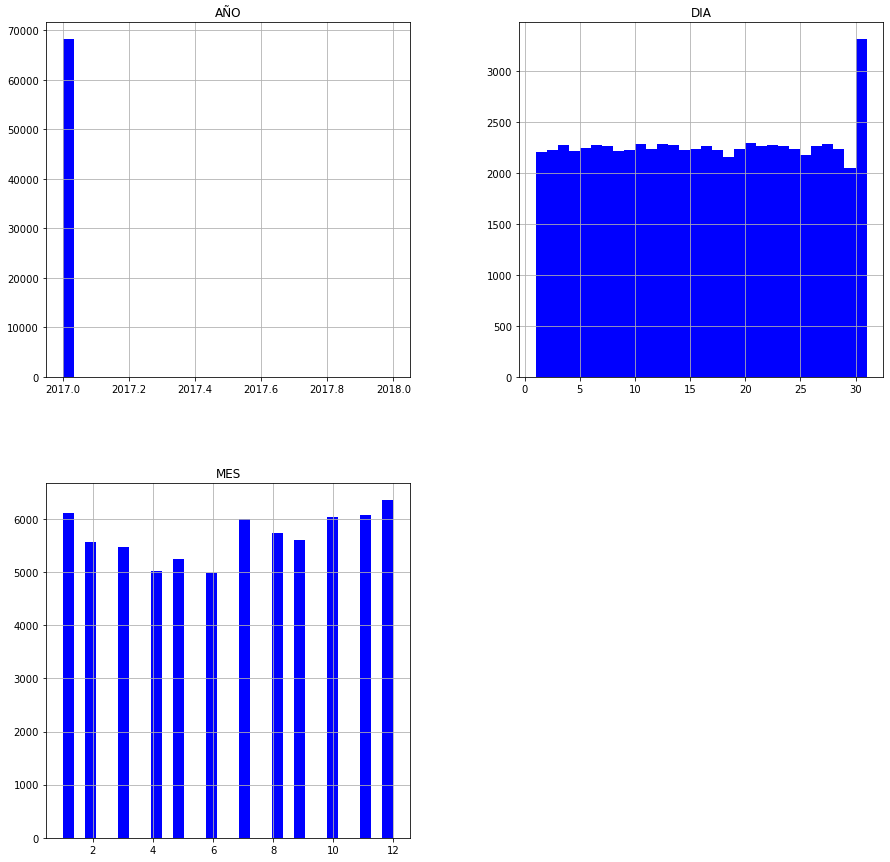

In [5]:
df.hist(bins = 30, figsize = (15,15) , color = "b")

Una buena forma de entender los datos es a través de histogramas. Sin realizar ninguna limpieza previa, tres histogramas aparecen. El primero de ellos indica que prácticamente todos los viajes son del año 2017 (si filtramos podemos identificar algunos de 2018), por lo que la data con la que estamos tratando es de 4 años de antigüedad. En un segundo histograma podemos ver la distribución de los vuelos por día. Se puede apreciar claramente que la cantidad de vuelos es relativamente estable a lo largo de los días, sin embargo, hay un peak de vuelos considerable en el día 31. Esto, a priori, podría deberse a que se incrementan los viajes en épocas de Navidad y Año Nuevo. Finalmente el tercer histograma indica la distribución mensual de los viajes. En el segundo semestre hay una mayor cantidad de viajes en comparación a la primera mitad del año y cabe destacar tres claros peaks: Enero, Julio y Diciembre, lo cual potencialmente se debe a las vacaciones de temporada de invierno y verano respectivamente.

## Ejercicio 2  
Antes de comenzar a crear éstas <font color='#174CB1'>__Synthetic Features__</font> decidí crear otras Features para poder facilitar el trabajo. Las fechas son de tipo __String__ , por lo que en primera instancia las convertí a __DateTime__. Separé la fecha de la hora y luego procedí a convertirlas al formato deseado.


In [6]:
fechaI = df['Fecha-I'].values
fechaO = df['Fecha-O'].values
horasI = []
horasO = []
fI = []
fO = []
d = fechaI.shape[0]
for i in range(d):
    horasI.append(datetime.datetime.strptime(fechaI[i].split(' ')[1], '%H:%M:%S'))
    horasO.append(datetime.datetime.strptime(fechaO[i].split(' ')[1], '%H:%M:%S'))
    fI.append(datetime.datetime.strptime(fechaO[i].split(' ')[0], '%Y-%m-%d'))
    fO.append(datetime.datetime.strptime(fechaO[i].split(' ')[0], '%Y-%m-%d'))
df['Hora-I'] = horasI
df['Hora-O'] = horasO
df['fI'] = fI
df['fO'] = fO

In [7]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Hora-I,Hora-O,fI,fO
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:33:00,2017-01-01,2017-01-01
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:39:00,2017-01-02,2017-01-02
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:39:00,2017-01-03,2017-01-03
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:33:00,2017-01-04,2017-01-04
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1900-01-01 23:30:00,1900-01-01 23:28:00,2017-01-05,2017-01-05


### Ejercicio 2.1: Temporada Alta

In [8]:
total = df.shape[0]

In [9]:
temporada_alta = []
for i in range(total):
    data = df['fI'][i]
    if ((data >= datetime.datetime(data.year - 1, 12, 15)) & (data <= datetime.datetime(data.year, 3, 3))):
        temporada_alta.append(1)
    elif ((data >= datetime.datetime(data.year, 12, 15)) & (data <= datetime.datetime(data.year+1, 3, 3))):
        temporada_alta.append(1)
    elif ((data >= datetime.datetime(data.year, 7, 15)) & (data <= datetime.datetime(data.year, 7, 31))):
        temporada_alta.append(1)
    elif ((data >= datetime.datetime(data.year, 9, 11)) & (data <= datetime.datetime(data.year, 9, 30))):
        temporada_alta.append(1)
    else:
        temporada_alta.append(0)
df['temporada_alta'] = temporada_alta

### Ejercicio 2.2: Diferencia de Minutos y Atrasos

In [10]:
dif_min = []
atraso_15 = []
for i in range(total):
    data = df.iloc[i]
    if (data['Fecha-I'] <= data['Fecha-O']):
        a = int((data['Hora-O'] - data['Hora-I']).seconds/60)
        dif_min.append(a)
        if a <=15:
            atraso_15.append(0)
        else:
            atraso_15.append(1)
    else:
        a = int((data['Hora-I'] - data['Hora-O']).seconds/60)
        dif_min.append(a)
        if a <=15:
            atraso_15.append(0)
        else:
            atraso_15.append(1)
df['dif_min'] = dif_min
df['atraso_15'] = atraso_15

### Ejercicio 2.3: Periodo Día

In [11]:
periodo_dia = []
for i in range(total):
    data = df['Hora-I'][i]
    if ((data >= datetime.datetime(1900, 1, 1,5,0)) & (data <= datetime.datetime(1900, 1, 1,11,59))):
        periodo_dia.append('mañana')
    elif ((data >= datetime.datetime(1900,1,1,12,0)) & (data <= datetime.datetime(1900, 1, 1, 18,59))):
        periodo_dia.append('tarde')
    else:
        periodo_dia.append('noche')
df['periodo_dia'] = periodo_dia

In [12]:
synthetic_features = df[['temporada_alta' , 'dif_min' , 'atraso_15' , 'periodo_dia']]
synthetic_features.set_index('temporada_alta' , inplace = True)
synthetic_features.to_csv('synthetic_features.csv')

## Ejercicio 3  
Para abordar éste ejercicio, primero identifiqué la distribución de vuelos puntuales vs los atrasados.

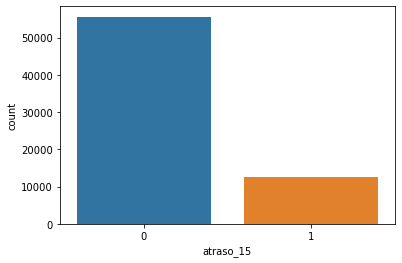

In [13]:
sns.countplot(x='atraso_15' , data=df)

La figura anterior permite identificar claramente que las clases no están balanceadas y que la cantidad de vuelos puntuales es considerablemente mayor a los vuelos atrasados, por lo que al momento de evaluar la efectividad de los modelos utilizar __Accuracy__ como medida no sería del todo adecuado, por lo que habrá que poner énfasis en otras medidas como __Precision__ , __Recall__ o __F1 Score__.  

### Ejercicio 3.1: Tasa de Atrasos Por Destino

In [14]:
pd.crosstab(df['SIGLADES'], df['atraso_15']).apply(lambda r: (r/r.sum()).round(2) * 100, axis=1).sort_values(by=1 , ascending = False).head()

atraso_15,0,1
SIGLADES,,
Puerto Stanley,0.0,100.0
Quito,0.0,100.0
Cochabamba,0.0,100.0
Ushuia,33.0,67.0
Sydney,42.0,58.0


In [15]:
pd.crosstab(df['SIGLADES'], df['atraso_15']).loc[['Puerto Stanley' , 'Cochabamba']]

atraso_15,0,1
SIGLADES,,
Puerto Stanley,0,1
Cochabamba,0,1


En una primera instancia, se podría pensar que __Puerto Stanley y Cochabamba__ son los destinos que mayor tasa de atraso presentan, un __100%__ , sin embargo, si nos adentramos en la cantidad de viajes realizados a dichas ciudades, podemos identificar que en ambos destinos se ha realizado solo un viaje y dicho viaje sufrió un retraso. De tal manera, éstos destinos no son representativos para concluir que efectivamente son los que más tasa de retraso presentan. Por lo tanto, decidí hacer un filtro el cual consistió en , solamente para analizar ésta tasa, considerar destinos con más de 50 viajes.

In [16]:
destinosdf = (pd.crosstab(df['SIGLADES'], df['atraso_15'])[0] + pd.crosstab(df['SIGLADES'], df['atraso_15'])[1]).copy()
destinos = destinosdf[destinosdf<50].index
pd.crosstab(df['SIGLADES'], df['atraso_15']).drop(destinos).head()

atraso_15,0,1
SIGLADES,,
Antofagasta,4939,847
Arica,2106,330
Asuncion,166,66
Atlanta,337,21
Auckland N.Z.,226,135


In [17]:
pd.crosstab(df['SIGLADES'], df['atraso_15']).drop(destinos).apply(lambda r: (r/r.sum()).round(2) * 100, axis=1).sort_values(by=1 , ascending = False).head()

atraso_15,0,1
SIGLADES,,
Sydney,42.0,58.0
Rosario,60.0,40.0
Auckland N.Z.,63.0,37.0
Punta Cana,67.0,33.0
Toronto,69.0,31.0


In [18]:
pd.crosstab(df['SIGLADES'], df['atraso_15']).drop(destinos).loc[['Sydney' , 'Rosario' , 'Auckland N.Z.', 'Cordoba' , 'Toronto']]

atraso_15,0,1
SIGLADES,,
Sydney,81,113
Rosario,82,54
Auckland N.Z.,226,135
Cordoba,715,308
Toronto,194,89


Asi, luego de aplicar el filtro se puede concluir que el destino con tasa de retraso más elevada corresponde a __Sydney__ con un __58%__.

### Ejercicio 3.2: Tasa de Atrasos Por Aerolínea

In [19]:
pd.crosstab(df['OPERA'], df['atraso_15']).apply(lambda r: (r/r.sum()).round(2) * 100, axis=1).sort_values(by=1 , ascending = False).head()

atraso_15,0,1
OPERA,,
Plus Ultra Lineas Aereas,39.0,61.0
Qantas Airways,42.0,58.0
Air Canada,54.0,46.0
Latin American Wings,59.0,41.0
Gol Trans,64.0,36.0


De acuerdo a los datos, Plus Ultra Líneas Aéreas es la aerolínea con mayor tasa de de atrasos con un __61%__ en sus vuelos.

### Ejercicio 3.3: Tasa de Atrasos Por Mes del Año

atraso_15,0,1
MES,,
7,71.0,29.0
12,75.0,25.0
10,77.0,23.0
11,80.0,20.0
6,83.0,17.0


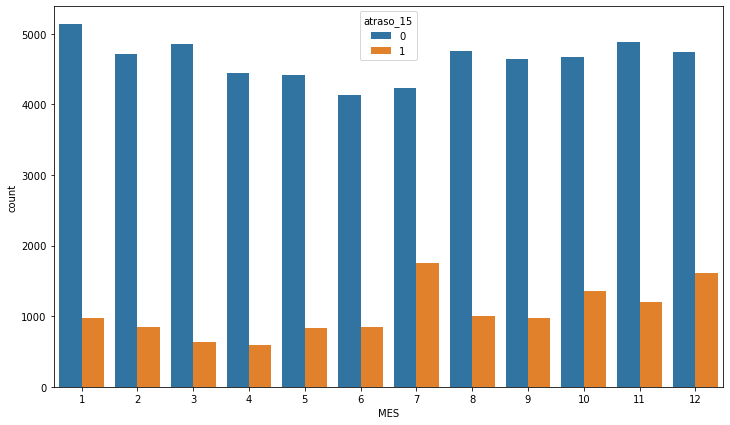

In [20]:
plt.figure(figsize = (12,7))
sns.countplot(x='MES' , hue = 'atraso_15' , data = df)
pd.crosstab(df['MES'], df['atraso_15']).apply(lambda r: (r/r.sum()).round(2) * 100, axis=1).sort_values(by=1 , ascending = False).head()

En base a la figura anterior, se puede apreciar que la cantidad de atrasos es mayor en dos meses en particular: Julio y Diciembre. Una conclusión prematura podría ser que ambos meses se relacionan con las vacaciones de invierno y verano respectivamente. Analizando las tasas, podemos ver que el mes con mayor atraso en sus vuelos corresponde a Julio con un __29%__,

### Ejercicio 3.4: Tasa de Atrasos Por Día de la Semana

atraso_15,0,1
DIANOM,,
Viernes,78.0,22.0
Jueves,80.0,20.0
Lunes,80.0,20.0
Martes,83.0,17.0
Miercoles,83.0,17.0


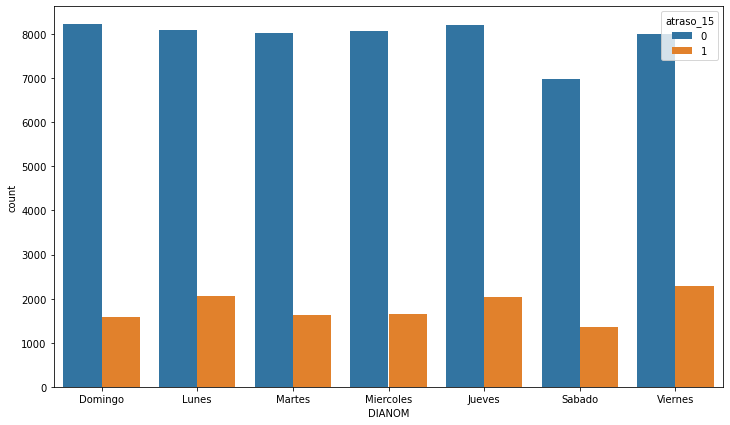

In [21]:
plt.figure(figsize = (12,7))
sns.countplot(x='DIANOM' , hue = 'atraso_15' , data = df)
pd.crosstab(df['DIANOM'], df['atraso_15']).apply(lambda r: (r/r.sum()).round(2) * 100, axis=1).sort_values(by=1 , ascending = False).head()

Basado en los datos, el día con mayor tasa de atraso es el día __Viernes__ con un __22%__.

### Ejercicio 3.5: Tasa de Atrasos Por Temporada

atraso_15,0,1
temporada_alta,,
0,82.0,18.0
1,80.0,20.0


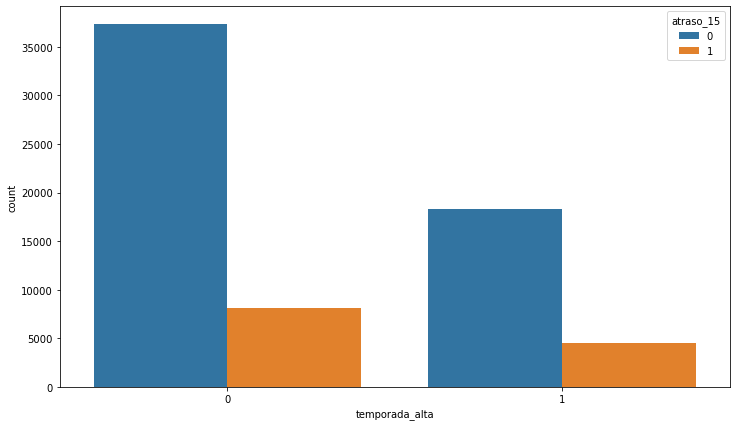

In [22]:
plt.figure(figsize = (12,7))
sns.countplot(x='temporada_alta' , hue = 'atraso_15' , data = df)
pd.crosstab(df['temporada_alta'], df['atraso_15']).apply(lambda r: (r/r.sum()).round(2) * 100, axis=1)

Como era de esperar, la mayor tasa de atrasos __20%__ se genera en período de temporada alta. Es interesante notar que la diferencia entre tasas de atrasos no es considerablemente notoria, ya que solo existe un __2%__ más de atrasos en comparación a los vuelos de temporada baja.

### Ejercicio 3.6: Tasa de Atrasos Por Tipo de Vuelo

atraso_15,0,1
TIPOVUELO,,
I,77.0,23.0
N,85.0,15.0


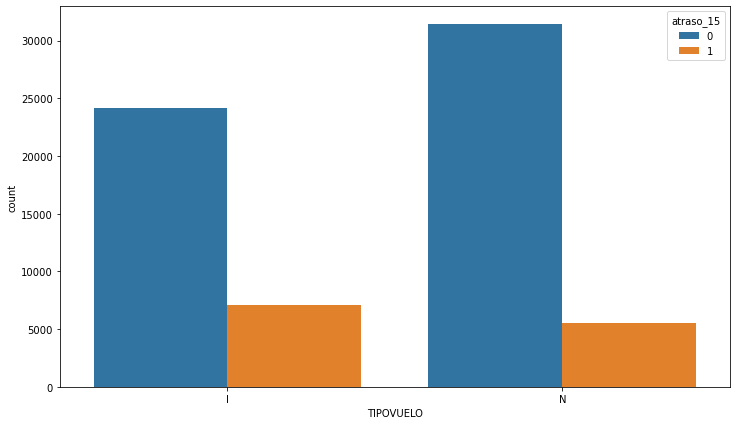

In [23]:
plt.figure(figsize = (12,7))
sns.countplot(x='TIPOVUELO' , hue = 'atraso_15' , data = df)
pd.crosstab(df['TIPOVUELO'], df['atraso_15']).apply(lambda r: (r/r.sum()).round(2) * 100, axis=1)

Considerando los datos y la figura expuesta, la mayor tasa de atrasos se presenta en el caso de los vuelos internacionales con un __23%__ de atrasos.  

Con respecto a las variables, creo que podrían tener una mayor influencia en el modelo aquellas que presentan un gran rango de valores, por ejemplo la tasa de atraso entre destinos y aerolíneas. Otras tasas como por ejemplo la tasa de atraso por día de la semana es más o menos constante por lo que no ayudaría mucho a diferenciar instancias.

In [24]:
tasades = pd.crosstab(df['SIGLADES'], df['atraso_15']).apply(lambda r: (r/r.sum()).round(2), axis=1)[1]
tasaope = pd.crosstab(df['OPERA'], df['atraso_15']).apply(lambda r: (r/r.sum()).round(2), axis=1)[1]
tasames = pd.crosstab(df['MES'], df['atraso_15']).apply(lambda r: (r/r.sum()).round(2), axis=1)[1]
tasadia = pd.crosstab(df['DIANOM'], df['atraso_15']).apply(lambda r: (r/r.sum()).round(2), axis=1)[1]
tasatem = pd.crosstab(df['temporada_alta'], df['atraso_15']).apply(lambda r: (r/r.sum()).round(2), axis=1)[1]
tasavue = pd.crosstab(df['TIPOVUELO'], df['atraso_15']).apply(lambda r: (r/r.sum()).round(2), axis=1)[1]

In [25]:
tasasdf = []
data = df.values
for i in range(total):
    temp = data[i]
    d = {
        'tasades': tasades.loc[temp[17]],
        'tasaope' : tasaope.loc[temp[15]] ,
        'tasames' : tasames.loc[temp[11]],
        'tasadia' : tasadia.loc[temp[13]],
        'tasatem' : tasatem.loc[temp[22]],
        'tasavue' : tasavue.loc[temp[14]]
    }
    tasasdf.append(d)
tasasdf = pd.DataFrame(tasasdf)

In [26]:
tasasdf

,tasades,tasaope,tasames,tasadia,tasatem,tasavue
0,0.19,0.07,0.16,0.16,0.2,0.23
1,0.19,0.07,0.16,0.20,0.2,0.23
2,0.19,0.07,0.16,0.17,0.2,0.23
3,0.19,0.07,0.16,0.17,0.2,0.23
4,0.19,0.07,0.16,0.20,0.2,0.23
...,...,...,...,...,...,...
68201,0.23,0.18,0.25,0.22,0.2,0.23
68202,0.23,0.18,0.25,0.20,0.2,0.23
68203,0.23,0.18,0.25,0.17,0.2,0.23
68204,0.23,0.18,0.25,0.22,0.2,0.23


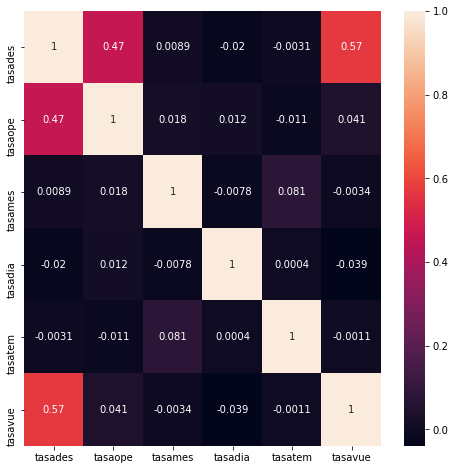

In [27]:
correlations = tasasdf.corr()
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(correlations,annot=True)

La matriz anterior indica las diferentes correlaciones existentes entre las tasas calculadas. Se pueden identificar dos correlaciones bastante altas. La primera de ellas entre la tasa de atraso del destino y la tasa de atraso del tipo de vuelo (ya sea internacional o nacional) con una correlación positiva de un __58%__. La otra correlación con un valor de __47%__ entre la tasa de atraso del destino y la tasa de atraso de la aerolínea que opera el vuelo.

In [28]:
df = pd.concat([df,tasasdf] , axis = 1)
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,temporada_alta,dif_min,atraso_15,periodo_dia,tasades,tasaope,tasames,tasadia,tasatem,tasavue
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,3,0,noche,0.19,0.07,0.16,0.16,0.2,0.23
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,9,0,noche,0.19,0.07,0.16,0.20,0.2,0.23
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,9,0,noche,0.19,0.07,0.16,0.17,0.2,0.23
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,3,0,noche,0.19,0.07,0.16,0.17,0.2,0.23
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2,0,noche,0.19,0.07,0.16,0.20,0.2,0.23


## Ejercicio 4: Desarrollo de Modelos

### Sección 4.1 : Eliminando Variables Innecesarias

In [29]:
dfbackup = df.copy()
df.drop(['Fecha-I' , 'Ori-I','Fecha-O','AÑO','DIA','Hora-O','fO','dif_min'] , axis = 1 , inplace = True)

In [30]:
df.head()

,Vlo-I,Des-I,Emp-I,Vlo-O,Ori-O,Des-O,Emp-O,MES,DIANOM,TIPOVUELO,...,fI,temporada_alta,atraso_15,periodo_dia,tasades,tasaope,tasames,tasadia,tasatem,tasavue
0,226,KMIA,AAL,226,SCEL,KMIA,AAL,1,Domingo,I,...,2017-01-01,1,0,noche,0.19,0.07,0.16,0.16,0.2,0.23
1,226,KMIA,AAL,226,SCEL,KMIA,AAL,1,Lunes,I,...,2017-01-02,1,0,noche,0.19,0.07,0.16,0.20,0.2,0.23
2,226,KMIA,AAL,226,SCEL,KMIA,AAL,1,Martes,I,...,2017-01-03,1,0,noche,0.19,0.07,0.16,0.17,0.2,0.23
3,226,KMIA,AAL,226,SCEL,KMIA,AAL,1,Miercoles,I,...,2017-01-04,1,0,noche,0.19,0.07,0.16,0.17,0.2,0.23
4,226,KMIA,AAL,226,SCEL,KMIA,AAL,1,Jueves,I,...,2017-01-05,1,0,noche,0.19,0.07,0.16,0.20,0.2,0.23


### Sección 4.2: Convirtiendo Variables a Categóricas

<font color='red'>__Obs:__</font> Cuando recién comencé a experimentar con las variables, en una primera instancia había decidido transformar a binarias prácticamente todo el set de variables categóricas. Sin embargo, consideré y verifiqué con modelos previos que ésto no era del todo útil y que la información quedaba capturada de mejor manera en las tasas calculadas en la sección anterior. Aún asi quise mantener ésta sección dentro del presente informe para demostrar el procedimiento para transformar las variables categóricas a binarias.

In [31]:
from sklearn.preprocessing import OneHotEncoder
def Column2Cat(column):
    onehotencoder = OneHotEncoder()
    prod = onehotencoder.fit_transform(pd.DataFrame(column)).toarray() # Convertir a categórico
    prod = pd.DataFrame(prod, columns = np.sort(column.unique())) #Hacer un df con columnas
    return prod

In [32]:
dfDias = Column2Cat(df['DIANOM'])
dfPeriodo = Column2Cat(df['periodo_dia'])
dfTipoVuelo = pd.get_dummies(df['TIPOVUELO'], drop_first = True)
dfMes = Column2Cat(df['MES'])
dfEmpI = Column2Cat(df['Emp-I'])
dfEmpO = Column2Cat(df['Emp-O'])
dfEmpO.head()

,48O,56R,AAL,ACA,AFR,AMX,ARG,AUT,AVA,AZA,...,LPE,LRC,LXP,ONE,PUE,QFA,SKU,TAM,TPU,UAL
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
emp = df['Emp-I'] +" "+ df['Emp-O']
from sklearn.feature_extraction.text import CountVectorizer
empvec = CountVectorizer()
emp = empvec.fit_transform(emp.values)
emp = pd.DataFrame(emp.toarray() , columns = (x.upper() for x in empvec.get_feature_names()))
emp.head()

,48O,56R,AAL,ACA,AFR,AMX,ARG,AUT,AVA,AZA,...,LRC,LXP,ONE,PUE,QFA,QFU,SKU,TAM,TPU,UAL
0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y = df['atraso_15']
df.drop(['DIANOM' , 'periodo_dia' , 'TIPOVUELO' , 'Emp-O' , 'Emp-I' ,'OPERA','SIGLAORI','SIGLADES' , 'Vlo-I','Vlo-O','MES','fI','Hora-I','atraso_15' , 'Des-I' , 'Ori-O' , 'Des-O' , 'tasadia'] , axis = 1 , inplace = True)

In [35]:
df.head()

,temporada_alta,tasades,tasaope,tasames,tasatem,tasavue
0,1,0.19,0.07,0.16,0.2,0.23
1,1,0.19,0.07,0.16,0.2,0.23
2,1,0.19,0.07,0.16,0.2,0.23
3,1,0.19,0.07,0.16,0.2,0.23
4,1,0.19,0.07,0.16,0.2,0.23


### Sección 4.4: Modelos

Para este challenge decidí probar diferentes modelos. Comenzando por algo simple, ya que se trata de un problema de clasificación, con una __Regresión Logística__.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size = 0.20, random_state=42)

In [37]:
X_train

,temporada_alta,tasades,tasaope,tasames,tasatem,tasavue
11861,0,0.26,0.24,0.12,0.18,0.23
58611,0,0.12,0.18,0.20,0.18,0.15
9441,1,0.16,0.18,0.15,0.20,0.15
65349,1,0.16,0.18,0.25,0.20,0.15
14127,0,0.15,0.18,0.12,0.18,0.15
...,...,...,...,...,...,...
37194,1,0.26,0.18,0.29,0.20,0.23
6265,1,0.09,0.03,0.15,0.20,0.23
54886,0,0.25,0.18,0.23,0.18,0.23
860,1,0.58,0.58,0.16,0.20,0.23


Accuracy 81.17578067732005 %
              precision    recall  f1-score   support

           0       0.81      0.99      0.90     11068
           1       0.52      0.03      0.05      2574

    accuracy                           0.81     13642
   macro avg       0.67      0.51      0.47     13642
weighted avg       0.76      0.81      0.74     13642



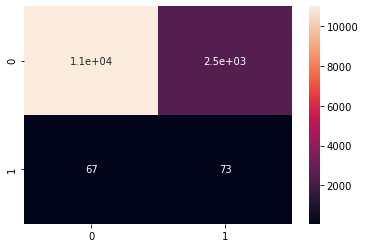

In [38]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy {} %'.format(100 * accuracy_score(y_pred,y_test)))
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm , annot = True)
print(classification_report(y_test , y_pred))

Aquí es donde cabe volver a mencionar el problema de las clases no balanceadas. Si consideráramos __Accuracy__ como la medida de éxito del modelo, entonces podríamos decir que este modelo resulta bastante bueno (80% de accuracy). Sin embargo, si nos vamos a la matriz de confusión nos damos cuenta que el Recall es increiblemente deficiente (3%). Esto nos dice que del total de casos de atrasos, el modelo solamente identifica un 3% lo cual demuestrav que no es el adecuado.  

A continuación, decidí probar con otro modelo: __Random Forest__

Accuracy 81.59360797537018 %
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     11068
           1       0.61      0.07      0.12      2574

    accuracy                           0.82     13642
   macro avg       0.71      0.53      0.51     13642
weighted avg       0.78      0.82      0.75     13642



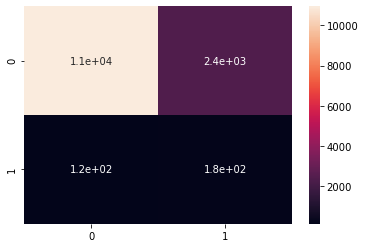

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)
print('Accuracy {} %'.format(100 * accuracy_score(y_pred,y_test)))
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm , annot = True)
print(classification_report(y_test , y_pred))

Random Forest es un ensemble de Decision Trees, algoritmo utilizado ampliamente por su efectividad. Como todo ensemble, se basa en la Teoría de "Sabiduría de los Grupos", la cual indica que la opinión colectiva de muchos puede superar la de un solo experto. Se puede apreciar una disminución en el Accuracy, y una mejora en el Recall del modelo (6%). Sin embargo, aún sigue siendo una porcentaje que en la realidad no tendría un gran uso. Siguiendo con otros modelos, decidí seguir con __XGBOOST__ , un algoritmo de tipo boosting, reconocido por ser uno de los más utilizados en competencias de Kaggle y en otros problemas de Machine Learning.

In [40]:
import xgboost as xgb


model = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.01, max_depth = 100, n_estimators = 100,use_label_encoder =False)

model.fit(X_train, y_train)

[23:19:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=100,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

Accuracy 81.57894736842105 %
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     11068
           1       0.62      0.06      0.11      2574

    accuracy                           0.82     13642
   macro avg       0.72      0.53      0.51     13642
weighted avg       0.78      0.82      0.75     13642



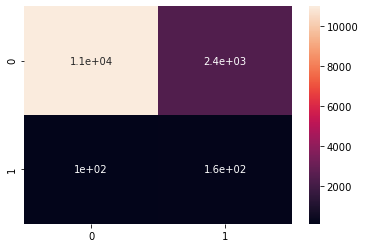

In [41]:
y_pred = model.predict(X_test)
print('Accuracy {} %'.format(100 * accuracy_score(y_pred,y_test)))
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm , annot = True)
print(classification_report(y_test , y_pred))

XGBOOST demostró tener resultados idénticos al Random Forest tanto en Accuracy, como en Recall y Precisión. Nuevamente queda demostrado como afecta el hecho que las clases estén imbalanceadas. Sin embargo, XGBOOST cuenta con un Hiperparámetro denominado __Scale_Pos_Weight__ diseñado para darle un mayor peso a los errores cometidos en clases positivas (en este caso los atrasos). El número utilizado habitualmente para este hiperparámetro es el ratio entre clases negativas / clases positivas. Para este caso __4__ (54590/13616).

In [42]:
import xgboost as xgb
model = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.01, max_depth = 100, n_estimators = 100 , scale_pos_weight = 4,use_label_encoder =False)
model.fit(X_train, y_train)

[23:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=100,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

Accuracy 65.5329130626008 %
              precision    recall  f1-score   support

           0       0.87      0.67      0.76     11068
           1       0.29      0.58      0.39      2574

    accuracy                           0.66     13642
   macro avg       0.58      0.63      0.57     13642
weighted avg       0.76      0.66      0.69     13642



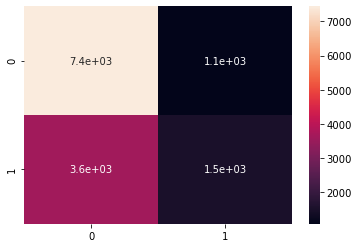

In [43]:
y_pred = model.predict(X_test)
print('Accuracy {} %'.format(100 * accuracy_score(y_test,y_pred)))
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm , annot = True)
print(classification_report(y_test , y_pred))

Al aplicar Scale_Pos_Weight al algoritmo, notamos una clara mejora en el Recall del modelo (58%). Obviamente esto va acompañado de un tradeoff con la Precisión del modelo que disminuyó a 29% y un Accuracy de 66%. Solo para seguir probando la efectividad de Scale_Pos_Weight decidí aumentar este parámetro.  

In [44]:
model = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.01, max_depth = 100, n_estimators = 100 , scale_pos_weight = 5.7,use_label_encoder =False)
model.fit(X_train, y_train)

[23:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=100,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5.7, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

Accuracy 54.39085178126375 %
              precision    recall  f1-score   support

           0       0.90      0.49      0.64     11068
           1       0.26      0.77      0.39      2574

    accuracy                           0.54     13642
   macro avg       0.58      0.63      0.51     13642
weighted avg       0.78      0.54      0.59     13642



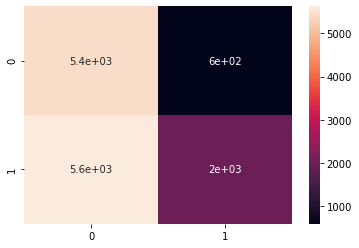

In [45]:
y_pred = model.predict(X_test)
print('Accuracy {} %'.format(100 * accuracy_score(y_test,y_pred)))
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm , annot = True)
print(classification_report(y_test , y_pred))

Como era de esperar, bajo estas nuevas condiciones incrementando el hiperparámetro de 4 a 5.8, el Recall del modelo sigue incrementando hasta 77%, disminuyendo considerablemente la precisión a 26% y un accuracy de 54%.

[23:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 22.210819527928457 %
              precision    recall  f1-score   support

           0       0.96      0.04      0.08     11068
           1       0.19      0.99      0.33      2574

    accuracy                           0.22     13642
   macro avg       0.58      0.52      0.20     13642
weighted avg       0.82      0.22      0.13     13642



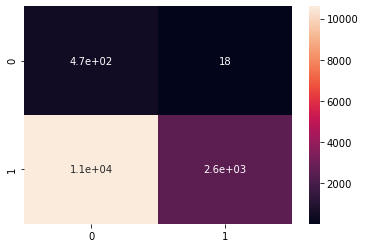

In [46]:
model = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.01, max_depth = 100, n_estimators = 100 , scale_pos_weight = 20,use_label_encoder =False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy {} %'.format(100 * accuracy_score(y_test,y_pred)))
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm , annot = True)
print(classification_report(y_test , y_pred))

Este último modelo representa un caso extremo en el que el Recall llega a un 99%, pero la precisión se ve muy afectada.

## Sección 5: Evaluación de Modelos

| Modelo | Accuracy | Precision |Recall|
| --- | --- | --- | --- |
| __Regresión Logística__| 81%  | 52% | 3%
| __Random Forest__ | 82% | 60% | 6%
| __XGBoost__| 82% | 62% | 6%
| __XGBoost con Scale_pos_weight = 4__ | 66% | 29% | 58%
| __XGBoost con Scale_pos_weight = 5.7__ | 54% | 26% | 77%
| __XGBoost con Scale_pos_weight = 20__ | 22% | 19% | 99%

A lo largo de este desafío probé diferentes modelos, pero decidí seleccionar éstos seis para el análisis del caso. Como mencioné al comienzo, dado que las clases están imbalanceadas, utilizar Accuracy como métrica de performance no es adecuado ya que podríamos escoger un modelo totalmente aleatorio que solamente realice como predicción que un vuelo siempre será puntual y obtener un Accuracy bastante bueno. En este caso dado que hay 13616 vuelos atrasados de un total de 68206 instancias, este modelo hipotético que solo entregara como predicción que todos los vuelos no se atrasarán, tendría un Accuracy de 80% ((68206-13616)/68206), pero en la práctica sería inútil.  

Como se puede ver en la tabla anterior el peor modelo fue la Regresión Logística, si bien tenía un Accuracy bastante alto, tenía un Recall increíblemente bajo, lo que se traduce en que de todos los vuelos realmente atrasados, solo identifica correctamente un 3%.  

Random Forest y XGBoost tuvieron una performance bastante similar, tanto en Accuracy, Precision y Recall. Si bien hubo una mejora en comparación al modelo de Regresión Logística, ésta mejora no fue del todo suficiente y el modelo seguía siendo ineficiente.

La gran diferencia se notó en los últimos tres modelos correspondientes a XGBoost, pero configurando el hiperparámetro Scale_pos_weight, el cual penaliza de mayor forma los errores cometidos en la clase con menor cantidad. Comúnmente se utiliza como valor el cociente entre clases negativas / clases positivas. Para éste caso en particular el ratio fue de 4 y luego solamente para seguir probando el efecto que tenía este hiperparámetro se ejecutaron dos modelos más con valores de 5.7 y 20 (caso extremo) respectivamente. Estos tres modelos tuvieron un incremento notable en Recall (58%, 77% e incluso 99%). Sin embargo, éste incremento representa un Trade Off con la Precision del Modelo que disminuyó drásticamente (29%,26% y 19%). Entonces, aquí es donde vale la pena preguntarse qué es lo que se busca a través de éste modelo: ¿un modelo que logre acertar en la gran mayoría de las predicciones que haga aunque no sea capaz de detectar todos los vuelos atrasados(Alta Precision/Menor Recall)? ¿O un modelo que logre identificar en su mayoría los vuelos atrasados, aunque confunda algunos que efectivamente son puntuales y los clasifica como atrasados (Alto Recall , Menor Precisión)?. Dada la calidad del dataset y del problema, __Recall__ es la medida que importa en este caso.  

Decidí elegir éstos algoritmos ya que son los que más éxito, según la literatura y competencias, han tenido. Comencé con la regresión logística ya que es uno de los algoritmos más básicos de clasificación o por lo menos en mi caso fue el primero que aprendí. Luego seguí avanzando con el ensemble que son los Random Forests, basándose en la teoría de la Sabiduría del Grupo y luego finalicé con XGBoost que es un algoritmo de tipo boosting que va haciendo hincapié en los residuos para asi ir mejorando cada vez más y más en las predicciones. Si tuviera que decidirme por un solo modelo, sería por el modelo número cinco. Si bien no tiene la mejor precisión, presenta un recall bastante bueno y es precisamente lo que se busca en este tipo de problemas.

Como expliqué en secciones anteriores, en un comienzo había decidido probar solamente con variables binarias lo cual fue un error ya que las tasas lograron captar de mejor forma la información. No ocupé todas las tasas ya que, bajo mi perspectiva, ciertas tasas se encontraban de forma implícita en otra, por ejemplo la tasa de atraso diaria con la tasa de atraso mensual.

Considero que una buena forma de mejorar el modelo es aumentar el dataset. Si pudiéramos obtener la misma información de años posteriores podríamos tener un set de más de 240.000 datos. También tratar de "replicar" la cantidad de instancias que presentan un vuelo atrasado (si bien lo ideal es tener más instancias diferentes con vuelos atrasados), para que el modelo pueda identificar y desarrollar de mejor manera patrones óptimos de clasificación.